# Lighthill's Elongated-Body Theory (EBT)

Lighthill's large-amplitude elongated-body theory utilizes reactive (rather than resistive) theory in order to interpret observational data on animal movements of arbitrary large amplitude. Reactive theory emphasizes reactive forces between a small volume of water and the parts of the animal's surface in contact with it. 

Lighthill's large-amplitude elongated-body theory applies to fish that swim with carangiform motion. Carangiform motion is characterized by fast forward motion, larger wave amplitudes towards the tail in the last half or one-third of the body length than in the anterior, and slower phase of lateral oscillations in this posterior section than that of the anterior. As a result, reactive forces seem to dominate in carangiform motion because the acceleration of water passed by the fish takes place very fast when the posterior section passes and flicks it into motion through the instantaneously acting virtual-mass effect.

The goal of Lighthill's 1971 paper is to extend reactive theory and slender-body theory so that it can be applied to interpret observational data on animal movements of arbitrary large amplitude. In this model, it is hopefully applied to carangiform movements. 

In terms of force and propulsion, Lighthill's elongated-body theory makes use of three principles in a frame of reference in which the water far from the fish is at rest:

1. Water momentum near a section of fish is in a direction perpendicular to the backbone and has magnitude equal to the virtual mass, $m$ per unit length, times the component $w$ of fish velocity in that direction.
2. Thrust can be obtained by considering rate of change of momentum within a volume enclosing the fish whose boundary at each instant includes a flat surface $\Pi$ perpendicular to the caudal fin through its posterior end.
3. In the momentum balance it is necessary to take into account transfer of momentum across $\Pi$ not only by convection but also by the action of the resultant $\frac{1}{2} mw^2$ of the pressures generated by the motions within the plane $\Pi$.

The coordinates used by Lighthill are:

* $y$-axis as the vertical
* $x$-axis and $z$-axis as the horizontal
* Lagrangian coordinate a along the fish body that takes values from 0 (tail) to $l$ (head), the length of the fish

where a left-handed system of axes is used.

The fish swims at a fixed horizontal level ($y=0$), where the constant mean direction of swimming is taken as that of the positive $x$-axis. Additionally, the position coordinates are regarded as $(x(a,t), z(a,t))$ as the point moves due (i) to swimming actions, (ii) to the resulting forward motion of the fish, and (iii) to any lateral recoil motions that may be involuntarily produced.

In addition, we have several notation:

* $(u,w)$ is the horizontal velocity vector (in the Lagrangian fish body frame), where $u$ is the tangential component (forward direction) and $w$ is the perpendicular component (lateral direction) of the fish body
* $(P,Q)$ is the force vector where $P$ is thrust and $Q$ is sideforce; $P$ is forward direction, $Q$ is lateral direction
* $V$ is the magnitude of the $(u,w)$
* $W$ is the component perpendicular to the direction of mean motion

In an elongated body form, the virtual mass is large in respect of the $w$ motions, while the $u$ motions have negligible virtual mass.

The inextensibility of the fish's spinal column requires $ \left(\frac{\partial x}{\partial a}\right)^2 + \left(\frac{\partial z}{\partial a}\right)^2 = 1$. 

The horizontal velocity vector (in a left-handed $x-z$ coordinate system) $\left(\frac{\partial x}{\partial t}, \frac{\partial z}{\partial t} \right)$ has a tangential component (relative to the spinal column) $u= \frac{\partial x}{\partial t} \frac{\partial x}{\partial a} + \frac{\partial z}{\partial t} \frac{\partial z}{\partial a}$ and a perpendicular component $w= \frac{\partial z}{\partial t} \frac{\partial x}{\partial a} - \frac{\partial x}{\partial t} \frac{\partial z}{\partial a}$.

The momentum per unit length of fish is represented by the vector $mw\left(-\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right)$ where the factor in parentheses is a unit vector in the $w$-direction. $m$ is the given cross-section of the fish, which can be approximated by $\frac{1}{4} \pi \rho s^2$, where $\rho$ is the water density and $s$ is the depth of the cross-section. $m$ should be a fixed, known function $m(a)$.

It is difficult to use the rate of change of the momentum in the wake. A better approach would be to study the rate of change of momentum in a part $V$ that excludes the wake. This is done by considering a vertical plane $\Pi$ intersecting the tip of the caudal fin at right angles to the tip of the spinal column. This plane swings around as the fine moves. At each instant, the part $V$ of water whose momentum is considered is that half-space, bounded by the plane $\Pi$, which includes the fish and excludes the wake. The momentum in $V$ can be written as the integral of $mw \left( -\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right)$ from $0$ to $l$ with respect to $a$, and its rate of change can be written as the sum of three terms:

1. rate of change due to convection of momentum out of $V$ across the plane $\Pi$
2. rate of change due to the pressure force acting across $\Pi$
3. minus the reactive force $(P,Q)$ with which the fluid acts on the fish

In general, 
$(P,Q) = \left[mw \left( \frac{\partial z}{\partial t}, -\frac{\partial x}{\partial t} \right) - \frac{1}{2} mw^2 \left(\frac{\partial x}{\partial a}, \frac{\partial z}{\partial a} \right) \right]_{a=0} - \frac{d}{dt} \int_{0}^{l} mw \left(-\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right) da$

The mean thrust can be written as $\overline{P} = \overline{ \left[ mw \left(\frac{\partial z}{\partial t}-\frac{1}{2} w \frac{\partial x}{\partial a} \right) \right]_{a=0}}$


## Numerical Implementation

This implementation will be the most useful when we have arbitrary data and functions that cannot be solved analytically. 

We will mainly be working with numPy, which can handle numerical differentiation and integration.

We will attempt to plot some waveforms as well as extract steps such as dx, dz, and da. Our overall goal is to be able to see a simplistic waveform model (best through animation), test for consistency in coordinate axes, and utilize our results for force production.

We will use cubic splining in order to fit functions to kinematics data.

In [2]:
%matplotlib inline

from scipy.interpolate import InterpolatedUnivariateSpline
import math
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import csv
from scipy.integrate import simps
from scipy.integrate import cumtrapz
from mpl_toolkits.mplot3d import Axes3D

In [1]:
class Lighthill:
    """
    This is a class for calculating force numbers using Lighthill's
    large-amplitude elongated body theory.

    This method makes use of cubic splines (using the InterpolatedUnivariateSpline package)
    to compute derivatives. SI units should be used for all values (time in seconds, mass in kilograms,
    length in meters, velocity in meters per second, force in Newtons).

    Attributes:
        filename (string): The file to read kinematics data from.
        t (float numpy array): An array of times at which data is taken.
        m (float numpy array): An array of virtual mass per length along the
        fish's body.
        rho (float): The density of the fluid.
        numStep (int): The number of points to fit splined data to.
    """

    def __init__(self, filename, t, m, numStep):
        self.t = t
        self.m = m

        self.body = None
        self.extractBody(filename)
        self.tail = None
        self.extractTail()
        self.underwaterTail = None
        self.underwater()

        self.a = None
        self.aCoordinates()

        self.a_new = None # use this a coordinate when plotting
        self.x = None
        self.z = None
        self.dxda = None
        self.dzda = None
        self.dxdt = None
        self.dzdt = None
        self.cubicSplinesinterp(numStep)

        self.w = None
        self.computeW()

        self.p = None
        self.q = None
        self.pavg = None
        self.Ptail = None
        self.Pinte = None
        self.qavg = None
        self.qtail = None
        self.qinte = None
        self.p_antidev = None
        self.q_antidev = None
        self.computeP()
        self.computeQ()

        # self.inextBool = None  # inextensibility Boolean
        # self.inextensibilityCheck()

    # def inextensibilityCheck(self,err=0):
        # """
        # The inextensibilityCheck function checks the inextensibility of the
        # fish body.

        # Parameters:
        #     err (float): The tolerance at which inextensibilityCheck is
        #     allowed to deviate (+/-) from 1.b

        # Returns:
        #     boolean: Returns whether all of the elements in the array return
        #     1 +/- err.
        # """
        # inextensibilityArray = self.dxda**2 + self.dzda**2
        # self.inextBool = np.all([x>=(1-err) and x<=(1+err) for x in i for
        # i in inextensibilityArray])

    def extractBody(self, filename):
        """
        The extractBody function extracts kinematic data from a given midline
        file.

        Parameters:
            filename (string): The file to read kinematics data from.

        Assigns:
            self.body (array): A masked numpy array of array of arrays in the form
            [[-y, x]] along the body at a given time. 
        """
        # masked array to cover -1000 values
        midlinedata = np.genfromtxt(filename, delimiter=",", skip_header=1,
                                    missing_values=-1000, dtype=float,
                                    usemask=True, unpack=True)

        # pre-allocate array to group coordinates together
        midlinearray = np.ma.empty([len(midlinedata)//2,
                                    len(midlinedata[0]), 2])

        for i in range(0, len(midlinedata)//2):
            # (x,y) from Excel file becomes (-y,x) to be consistent with
            # Lighthill axes
            midlinearray[i] = np.ma.dstack((-1*midlinedata[2*i+1]/100,
                                            midlinedata[2*i]/100))  # cm->m

        self.body = midlinearray

    def extractTail(self):
        """
        The extractTail function extracts the tail points from the kinematics
        data.

        Assigns:
            self.tail (array): A masked numpy array of arrays, in which -y data is
            in its own array and x data is in its own array.
        """
        midlinearray = self.body

        # extract tail points at last valid index in masked array
        compressedmidline = np.ma.empty([len(midlinearray), 2])
        for i in range(0, len(midlinearray)):
            lastindex = np.ma.count(midlinearray[i])//2-1
            compressedmidline[i] = midlinearray[i][lastindex]

        # transpose midline data so that the array is in the form
        # [[-yarray] [xarray]]
        transposedmidline = np.transpose(compressedmidline)

        self.tail = transposedmidline

    def underwater(self):
        """
        The underwater function extracts the tail points that are underwater.

        Assigns:
            self.underwaterTail (array): An array of arrays of -y data and x data
            underwater, where the air-water interface is determine to be at y=0.
        """
        tailarray = self.tail
        taily = tailarray[0]
        tailx = tailarray[1]
        # want the portion where y>=0 in our specified axes
        self.underwaterTail = np.ma.array([taily[taily >= 0],
                                           tailx[taily >= 0]], dtype=float)

    def aCoordinates(self):
        """
        The aCoordinates function extracts the Lagrangian a coordinate along
        the fish body.

        Assigns:
            self.a (array): An array of arrays with Lagrangian coordinates along
            the body at a given time, with index 0 within each array of array
            being the snout.
        """
        # pre-allocate da array
        daArray = np.ma.empty([len(self.body), len(self.body[0])-1])

        for i in range(0, len(self.body)):
            # -y and x coordinates for a given time
            currenty = np.transpose(self.body[i])[0]
            currentx = np.transpose(self.body[i])[1]
            daArray[i] = ma.sqrt((np.diff(currenty))**2+(np.diff(currentx))**2)

        # pre-allocate a array
        aArray = np.ma.empty([len(self.body), len(self.body[0])])

        for i in range(0, len(daArray)):
            # concatenate with 0, which should be the snout
            aArray[i] = np.ma.concatenate((np.array([0]),
                                           np.cumsum(daArray[i])), axis=0)
        self.a = aArray

    def cubicSplinesinterp(self, numStep):
        """
        The cubicSplinesinterp function computes many of the partial
        derivatives dx/da, dz/da, dx/dt, and dz/dt in Lagrangian's formalism.

        Note that in order to produce smooth functions, the a derivatives must
        be transposed when plotted but not when used to calculate force. On
        the other hand, the time derivatives must be transposed when used to
        calculate force but not when plotted. This is counter-intuitive and 
        can be improved, but to produce smooth outputs, we will attempt to use
        this method.
        
        Assigns:
            self.a_new (array): An array of arrays with modified Lagrangian coordinates
            along the body at a given time, with 0 index being the snout.
            self.x (array): An array of arrays of the Lighthill x position at a given
            time.
            self.z (array): An array of arrays of the Lighthill z position at a given
            time.
            self.dxda (array): An array of arrays of Lighthill dx/da at a given time.
            self.dzda (array): An array of arrays of Lighthill dz/da at a given time.
            self.dxdt (array): An array of arrays of Lighthill dx/dt at a given a coordinate.
            self.dzdt (array): An array of arrays of Lighthill dz/dt at a given a coordinate.
        """
        # pre-allocate positions
        xArray = np.ma.empty([len(self.body), numStep])
        zArray = np.ma.empty([len(self.body), numStep])

        # pre-allocate a derivatives
        dxdaArray = np.ma.empty([len(self.body), numStep])
        dzdaArray = np.ma.empty([len(self.body), numStep])

        # pre-allocate t derivatives
        dxdtArray = np.ma.empty([len(self.body), numStep])
        dzdtArray = np.ma.empty([len(self.body), numStep])

        # new, scaled a array to remove masked points
        anewArray = np.ma.empty([len(self.body), numStep])

        # very inefficient way of computing partial derivatives!

        # for-loop to compute a derivatives
        for i in range(len(self.body)):
            # take the columns of the positions
            colx = np.transpose(self.body[i])[0]
            colz = np.transpose(self.body[i])[1]
            currenta = self.a[i]
            last = np.ma.count(currenta)
            # for now, splined data will have 180 points
            anew = np.linspace(currenta[0], currenta[last-1], num=numStep,
                               endpoint=True)
            xaspline = InterpolatedUnivariateSpline(currenta[:last],
                                                    colx[:last])
            dxda = xaspline.derivative()
            zaspline = InterpolatedUnivariateSpline(currenta[:last],
                                                    colz[:last])
            dzda = zaspline.derivative()

            anewArray[i] = anew
            xArray[i] = xaspline(anew)
            zArray[i] = zaspline(anew)
            dxdaArray[i] = dxda(anew)
            dzdaArray[i] = dzda(anew)

        self.a_new = anewArray
        self.x = xArray
        self.z = zArray
        self.dxda = dxdaArray
        self.dzda = dzdaArray

        # for loop to compute t derivatives
        for i in range(len(self.x)):
            # take the rows of the positions, calculated from previous loop
            rowx = np.transpose(self.x)[i]
            rowz = np.transpose(self.z)[i]
            t = self.t

            xtspline = InterpolatedUnivariateSpline(t, rowx)
            dxdt = xtspline.derivative()
            ztspline = InterpolatedUnivariateSpline(t, rowz)
            dzdt = ztspline.derivative()

            dxdtArray[i] = dxdt(t)
            dzdtArray[i] = dzdt(t)

        self.dxdt = dxdtArray
        self.dzdt = dzdtArray

    def computeW(self):
        """
        Computes the W, the component perpendicular to the direction of mean
        motion.

        Assigns:
            self.w (array): An array of arrays of w values, which should be at
            a given a coordinate.
        """
        w = self.dzdt*np.transpose(self.dxda)-self.dxdt*np.transpose(self.dzda)
        self.w = w

    def computeP(self):
        """
        Computes P, the thrust force.

        The thrust force is broken into two terms: the integral term and the
        tail term.
        
        Assigns:
            self.pavg (float): A float of the average P value given the tail term.
            self.Ptail (array): An array of P values at the tail in increasing time. 
            self.Pinte (array): An array of P values calculated from the body in increasing
            time.
            self.p (array): An array of the total P values calculated using Lighthill's
            equations.
            self.p_antidev (array): An array holding cumulative antiderivatives of P; used
            to check model.
        """
        wTail = np.transpose(self.w)[-1]
        dzdtTail = np.transpose(self.dzdt)[-1]
        dxdaTail = self.dxda[-1]
        tailTerm = self.m[-1]*wTail*dzdtTail-(1/2)*self.m[-1]*wTail**2*dxdaTail
        self.pavg = np.mean(tailTerm)
        self.Ptail = tailTerm
        #print("Tail term:", tailTerm)
        #print("average P at tail:", self.pavg)
        integrand = self.m*self.w*(-np.transpose(self.dzda))
        integral = simps(integrand, np.transpose(self.a_new))  # simps integration
        # insert a 0 at the beginning of the array to work around divide by 0 error
        integralspline = InterpolatedUnivariateSpline(self.t, np.insert(integral[1:],0,0))
        integralTerm = integralspline.derivative()
        # plt.figure()
        # plt.plot(self.t, integral)
        # plt.show()
        # print(integral)
        self.Pinte = integralTerm(self.t)
        #print("Integral Term", integralTerm(self.t))
        self.p = tailTerm - integralTerm(self.t)
        self.p_antidev = cumtrapz(self.p, self.t)

    def computeQ(self):
        """
        Computes Q, the sideforce.

        Similar to the thrust force, the sideforce is also broken into two 
        terms: the integral term and the tail term.
        
        Assigns:
            self.qavg (float): A float of the average Q value given the tail term.
            self.qtail (array): An array of Q values at the tail in increasing time. 
            self.qinte (array): An array of Q values calculated from the body in increasing
            time.
            self.q (array): An array of the total Q values calculated using Lighthill's
            equations.
            self.q_antidev (array): An array holding cumulative antiderivatives of Q; used
            to check model.
        """
        wTail = np.transpose(self.w)[-1]
        dxdtTail = np.transpose(self.dxdt)[-1]
        # transpose or not transpose a terms
        dzdaTail = self.dzda[-1]
        tailTerm = (self.m[-1]*wTail*(-dxdtTail)-(1/2)
                    * self.m[-1] * wTail**2*dzdaTail)
        self.qavg = np.mean(tailTerm)  # average sideforce
        self.qtail = tailTerm
        #print("Tail term:", tailTerm)
        integrand = self.m*self.w*(np.transpose(self.dxda))
        integral = simps(integrand, np.transpose(self.a_new))  # simps integration
        integralspline = InterpolatedUnivariateSpline(self.t, np.insert(integral[1:],0,0))
        integralTerm = integralspline.derivative()
        self.qinte = integralTerm(self.t)
        # plt.figure()
        # plt.plot(self.t, integral)
        # plt.show()
        # print("Integral Term", integralTerm(self.t))
        self.q = tailTerm - integralTerm(self.t)
        self.q_antidev = cumtrapz(self.q, self.t)
    
    # def heatMap(self):
    #     xMap = np.ma.empty([len(self.body),len(self.anew[0])])
    #     zMap = np.ma.empty([len(self.body),len(self.anew[0])])

    #     for it in range(len(self.body)):
    #         for ia in range(len(self.anew[0])):
    #             currentaArray = self.anew[it]
    #             currentaValue = currentaArray[ia]
    #             xMap[it,ia] = self.xa[it,ia]
    #             zMap[it,ia] = self.za[it,ia]

    #     self.xMap = xMap
    #     self.zMap = zMap


#     def waveform(self):
#         """
#         waveform generates plots for testing and verifying calculations
#         need to rewrite this to comply with cubic spline data
#         """
#         plt.subplot(111)
        
#         #zvsx = plt.plot(self.x,self.z, label='z vs x')
#         #dzdxvsx = plt.plot(self.x[1:],(self.dz/self.dx),label='dz/dx vs x')
#         #avsx = plt.plot(self.x,self.a, label='a vs x')
#         #wvsx = plt.plot(self.x[1:],self.w, label='w vs x')
#         PvsQ = plt.plot(self.thrustForce,self.sideForce)
# #         xvsa = plt.plot(self.aCoordinates(),self.)
# #         yvsa = 
        
#         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    def test(self):
        print('t is: ', self.t)
        print('x is: ', self.x)
        print('z is: ', self.z)
        print('a is: ', self.a)
        print('w is: ', self.w)
        print('m is: ', self.m)
        print('dzdt is: ', self.dzdt)
        print('dxdt is: ', self.dxdt)
        print('dxda is: ', self.dxda)
        print('dzda is: ', self.dzda)
        # print('The force vector is: ', self.forceVector)
        # print('Is the body inextensible? ', self.inextBool)

### Tests

We will attempt to plot some waveforms as well as extract steps such as dx, dz, and da. Our overall goal is to be able to see a simplistic waveform model (best through animation), test for consistency in coordinate axes, and utilize our results for force production.

### Tests using Bainbridge data

Below are the tests using the Bainbridge data mentioned in Lighthill's 1971 paper. The data is already broken up into derivatives. According to the paper:
* $w = V \sin{\alpha}$
* $W = {\partial z}/{\partial t} = V \sin{\alpha + \theta}$
* ${\partial x}/{\partial a} = \cos{\theta}$


In [14]:
tBainbridge = np.array([0.04, 0.08, 0.12, 0.16, 0.20, 0.24,
                       0.28, 0.32, 0.36, 0.40])
VBainbridge = np.array([0.50, 0.60, 0.74, 0.68, 0.52, 0.62,
                       0.87, 0.67, 0.52, 0.48]) 
sBainbridge = np.array([0.094, 0.087, 0.079, 0.083, 0.087,
                 0.088, 0.083, 0.084, 0.092, 0.093])
mBainbridge = (1/4)*np.pi*997*(sBainbridge**2) 
wBainbridge = np.array([0.03, 0.03, 0.06, 0.19, 0.09, -0.09,
                       -0.24, -0.12, -0.05, 0.00])
WBainbridge = np.array([0.15, 0.42, 0.64, 0.50, 0.12, -0.36,
                       -0.75, -0.48, -0.22, -0.02]) # dz/dt
dxdaBainbridge = np.array([0.97, 0.74, 0.57, 0.85, 1.00, 
                          0.88, 0.72, 0.81, 0.95, 1.00])
alphathetaBrindge = np.array([17,45,60,48,13,-36,-60,-46,
                              -25,-3])
alphaBainbridge = np.array([3,3,5,16,10,-8,-16,-10,-6,0])
thetaBainbridge = alphathetaBrindge - alphaBainbridge

In [ ]:
print(mBainbridge) # these values match his values in the table

To find $w= \frac{\partial z}{\partial t} \frac{\partial x}{\partial a} - \frac{\partial x}{\partial t} \frac{\partial z}{\partial a}$, we broke it into these parts given Bainbridge's data:

* $\frac{\partial z}{\partial t} = W$
* $\frac{\partial x}{\partial a}$
* $\frac{\partial x}{\partial t} = V \cos{\alpha+\theta}$
* $\frac{\partial z}{\partial a} = \sin{\theta}$

and we have matching values as in the table.

In [30]:
# trying to compute w

print((WBainbridge*dxdaBainbridge)
      -(VBainbridge*np.cos(np.deg2rad(alphathetaBrindge)))*
      (np.sin(np.deg2rad(thetaBainbridge))))
# values actually match! 

[ 0.02982447  0.02691193  0.06171374  0.18388206  0.09348281 -0.08131751
 -0.23782361 -0.11523234 -0.05556622  0.00508683]


We will now try to simply multiply values together as Lighthill did. All of the values match Lighthill's calculations.

In [31]:
mwW = mBainbridge*wBainbridge*WBainbridge 
mw2 = (1/2)*mBainbridge*(wBainbridge**2)*dxdaBainbridge
mw3 = mwW-mw2

print(mwW) 
print(mw2)
print(mw3) # all these values match Lighthill's


print(WBainbridge*dxdaBainbridge)

[ 0.03113531  0.07467824  0.18765945  0.51246573  0.06400992  0.19646962
  0.9709877   0.3182483   0.07290434 -0.        ]
[0.00302013 0.00197364 0.00501403 0.08276322 0.02400372 0.02161166
 0.11185778 0.03222264 0.00787035 0.        ]
[ 0.02811519  0.0727046   0.18264543  0.42970252  0.0400062   0.17485796
  0.85912992  0.28602566  0.06503398 -0.        ]
[ 0.1455  0.3108  0.3648  0.425   0.12   -0.3168 -0.54   -0.3888 -0.209
 -0.02  ]


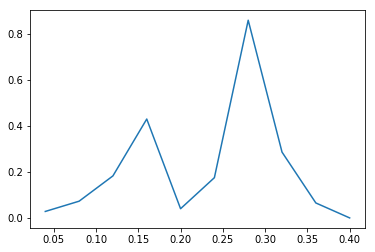

In [35]:
plt.plot(tBainbridge, mw3)

### Tests using midline data

From the archer fish midline CSV, we extracted the tail kinematics data from each set of time. We also attempted to use this real data to test the model.

In [3]:
"""
An attempt to import csv midline data and compute kinematics from those values
"""

midlinefile = "Mendelson_midlinedata.csv"
midlinedata = np.genfromtxt(midlinefile, delimiter=",", skip_header=1,
                            missing_values=-1000,dtype=float,
                            usemask=True, unpack=True) # Masked array to cover -1000 values

# pre-allocate array to group coordinates together
midlinearray = np.ma.empty([len(midlinedata)//2,len(midlinedata[0]),2])

for i in range(0,len(midlinedata)//2):
    midlinearray[i] = np.ma.dstack((midlinedata[2*i],midlinedata[2*i+1]))

# extract tail points 
compressedmidline = np.ma.empty([len(midlinearray),2])
for i in range(0,len(midlinearray)):
    lastindex = np.ma.count(midlinearray[i])//2-1
    compressedmidline[i] = midlinearray[i][lastindex]
    
# transpose midline data so that the array is in the form [[xarray] [yarray]]
transposedmidline = np.transpose(compressedmidline)

# making t array using given dt. Inefficient/redudant since it will be broken down into dt again... need to change something
midlinetime = np.concatenate((np.array([0]),np.cumsum(np.full(len(compressedmidline)-1,0.00111))))

# cross-section, guesstimate
archers = np.full(len(compressedmidline),0.08)

ymfile = "added_mass_per_length.csv"
ymdata = np.genfromtxt(ymfile, delimiter=",", skip_header=1,dtype=float,unpack=True) # Masked array to cover -1000 values

mdata = ymdata[1]/10
# print(mdata)

Below is the initialization for the midline data that we have. For now, it returns divide by zero errors due to the integral beginning with 0. However, it seems to not affect the plots overall.

In [4]:
archerfish = Lighthill("Mendelson_midlinedata.csv", midlinetime, mdata, 180);

/Users/vphun/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: divide by zero encountered in true_divide
  h0divh1 = h0 / h1
/Users/vphun/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:326: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/Users/vphun/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:328: RuntimeWarning: divide by zero encountered in true_divide
  y[slice1]*hsum*hsum/hprod +
/Users/vphun/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:328: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +


Below are the plots, labelled to indicate the data and the method of generating the plots.

Below is the for-loop method for generating dz/da against a. dz/da corresponds to the side-to-side motion, and we believe that it makes sense for the amplitude to be larger near the tail of the fish (at bigger a values). Further work can include analyzing the phase of the oscillations along the length of the fish's body.

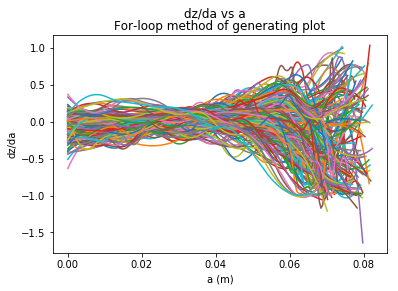

In [6]:
for i in range(len(archerfish.a_new)):
    plt.plot(archerfish.a_new[i], archerfish.dzda[i])
plt.suptitle('dz/da vs a')
plt.title('For-loop method of generating plot')
plt.xlabel('a (m)')
plt.ylabel('dz/da')
plt.show()

Similarly, we can reach the same plot by transposing a_new and dzda. Note that a_new's rows increase along the body, where we take index 0 to be the snout for now, while the columns increase along time. Similarly, the rows of dx/da and dz/da increase along the body while the columns increase along time. We believe that it makes physical sense, especially in the for-loop, to plot these matching values together. However, because of the way that matplotlib plots multi-dimensional arrays, we transpose these arrays when we are plotting them directly against each other, as shown below:

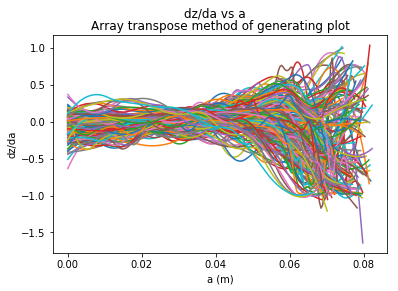

In [17]:
plt.plot(np.transpose(archerfish.a_new),np.transpose(archerfish.dzda));
plt.suptitle('dz/da vs a')
plt.title('Array transpose method of generating plot')
plt.xlabel('a (m)')
plt.ylabel('dz/da')
plt.show()

dx/da vs a is plotted below. dx/da corresponds with the forward motion. Again, the amplitudes are greater near the tail, as expected, since forms similar to carangiform rely on the tail for fast forward motion. Further work should compare the amplitudes of dx/da and dz/da as well as the phases.

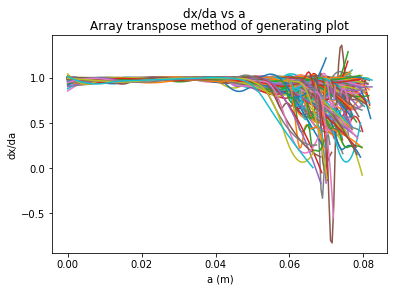

In [24]:
plt.plot(np.transpose(archerfish.a_new),np.transpose(archerfish.dxda));
plt.suptitle('dx/da vs a')
plt.title('Array transpose method of generating plot')
plt.xlabel('a (m)')
plt.ylabel('dx/da')
plt.show()

Below is the plot for generating dz/dt vs t. The time arrays are different from the a arrays. The t array is one-dimensional and increases with time. The rows of dx/dt and dz/dt increase along time, while the columns increase along the body. A problem that is still unclear is the need to transpose the dz/dt and dx/dt arrays when plotting in a loop. For now, we will retain the format that keeps the plots looking smooth.
dz/dt corresponds to the side-to-side velocity, which we see oscillates with increasing time. 

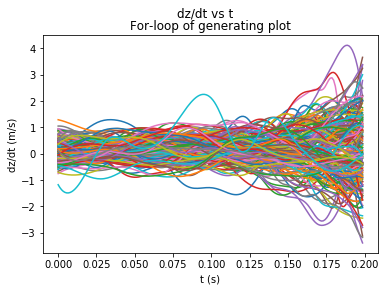

In [9]:
for i in range(len(archerfish.t)):
    plt.plot(archerfish.t,np.transpose(archerfish.dzdt)[i])
plt.suptitle('dz/dt vs t')
plt.title('For-loop of generating plot')
plt.xlabel('t (s)')
plt.ylabel('dz/dt (m/s)')
plt.show()

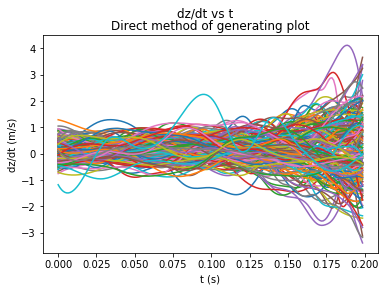

In [18]:
plt.plot(archerfish.t,archerfish.dzdt)
plt.suptitle('dz/dt vs t')
plt.title('Direct method of generating plot')
plt.xlabel('t (s)')
plt.ylabel('dz/dt (m/s)')
plt.show()

For the dx/dt vs t plots, which describe forward velocity, we see less oscillations and more linear portions. We believe that this makes physical sense, since the fish tends to continuously swim forward.

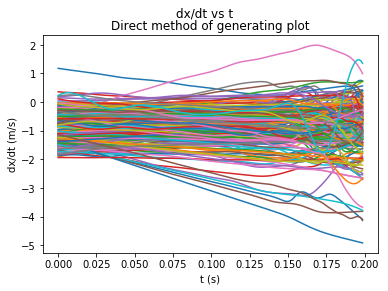

In [25]:
plt.plot(archerfish.t,archerfish.dxdt)
plt.suptitle('dx/dt vs t')
plt.title('Direct method of generating plot')
plt.xlabel('t (s)')
plt.ylabel('dx/dt (m/s)')
plt.show()

Below are more plots for testing, including the body positions against time and a random dz/da vs t test.

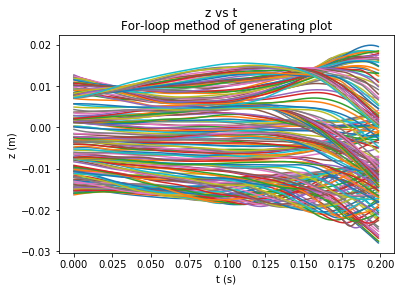

In [19]:
for i in range(180):
    plt.plot(archerfish.t, archerfish.z[i])
plt.suptitle('z vs t')
plt.title('For-loop method of generating plot')
plt.xlabel('t (s)')
plt.ylabel('z (m)')
plt.show()

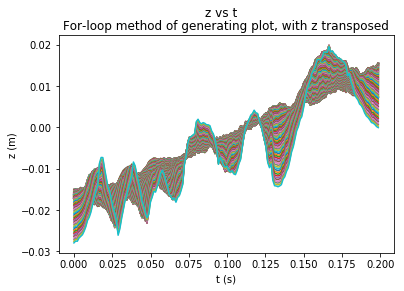

In [21]:
for i in range(180):
    plt.plot(archerfish.t, np.transpose(archerfish.z)[i])
plt.suptitle('z vs t')
plt.title('For-loop method of generating plot, with z transposed')
plt.xlabel('t (s)')
plt.ylabel('z (m)')
plt.show()

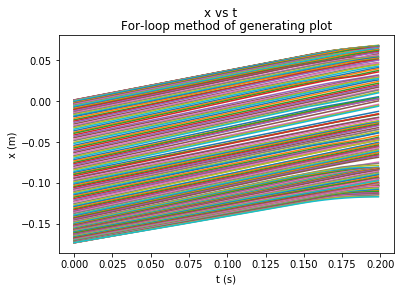

In [26]:
for i in range(180):
    plt.plot(archerfish.t, archerfish.x[i])
plt.suptitle('x vs t')
plt.title('For-loop method of generating plot')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.show()

Text(0,0.5,'dz/da')

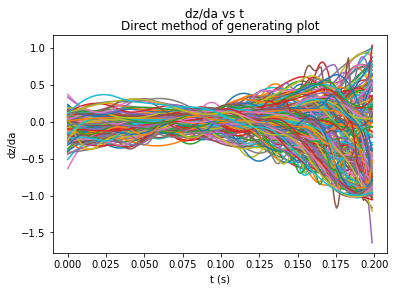

In [27]:
plt.plot(archerfish.t,np.transpose(archerfish.dzda))
plt.suptitle('dz/da vs t')
plt.title('Direct method of generating plot')
plt.xlabel('t (s)')
plt.ylabel('dz/da')

The crude 3D plot of position against time is plotted below, with t as the z axis:

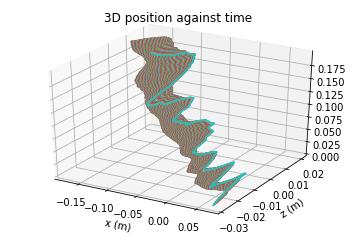

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')

z = archerfish.t
x = archerfish.x
y = archerfish.z
ax.plot(x, y, z)
plt.title('3D position against time')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.show()

All of the w values for each bodypoint are plotted against time. The next section provides functions to isolate a certain point on the body to analyze.

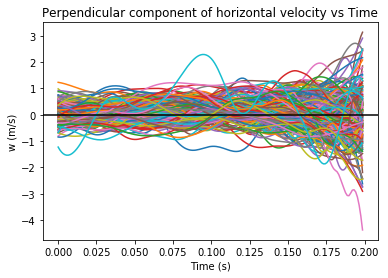

In [57]:
plt.plot(archerfish.t, archerfish.w)
plt.title('Perpendicular component of horizontal velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('w (m/s)')
plt.axhline(y=0,color='black')

### Checking physical data

Below is a script to generate plots in order to check the validity of our numerical calculations. In order to do this, we can plot the various data against the number of timesteps (180) and attempt to sync it with the video data.

The video data and plots may be off by at least one, since the video starts at index 1 while Python indexing starts at 0.

In [51]:
 def plotstyle(x, y, markers, title):
    plt.figure()
    plt.scatter(x,y)
    for i in markers:
        plt.scatter(x[i], y[i])
    plt.title(title)
    plt.axhline(y=0, color='black')
    plt.legend(['y=0', 'body'] + [str(i) for i in markers])
    plt.show()
    
def plotter(bodypoint, markers):
    plotstyle(np.transpose(archerfish.z)[bodypoint], -np.transpose(archerfish.x)[bodypoint],
              markers, 'position')
    plotstyle(range(len(archerfish.w)),np.transpose(archerfish.dzdt)[bodypoint], markers, 'dz/dt vs 180')
    plotstyle(range(len(archerfish.t)),archerfish.q, markers, 'Q vs 180')
    plotstyle(range(len(archerfish.w)),np.transpose(archerfish.dxdt)[bodypoint], markers, 'dx/dt vs 180')
    plotstyle(range(len(archerfish.t)),archerfish.p, markers, 'P vs 180')
    plotstyle(archerfish.t,np.transpose(archerfish.dxdt)[bodypoint], markers, 'dx/dt vs t')
    plotstyle(archerfish.a_new[bodypoint],archerfish.dxda[bodypoint], markers, 'dx/da vs a')
    plotstyle(archerfish.a_new[bodypoint],archerfish.dzda[bodypoint], markers, 'dz/da vs a')
    plotstyle(range(len(archerfish.w)),np.transpose(archerfish.w)[bodypoint], markers, 'w vs 180')
    plotstyle(range(len(archerfish.t)-1), archerfish.p_antidev, markers, 'p antiderivative vs 180')
    plotstyle(range(len(archerfish.t)-1), archerfish.q_antidev, markers, 'q antiderivative vs 180')
    

Below are the plots for the tail. On all of the plots, position y = 0 is the boundary between air and water. For the tail, the last bodypoint at which the fish's tail is still in water is at index 65. In addition, the snout of the fish attaches to the bait at around index 149, so we expect the data to become noisier past this point. The list of points before the plots are the transitions of the tailbeats. P and Q should be the same at all bodypoints, but is included for convenience.

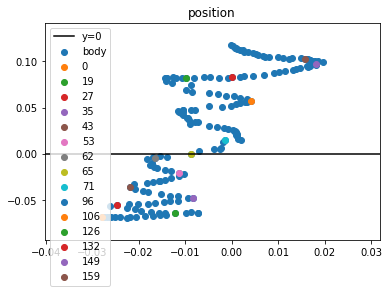

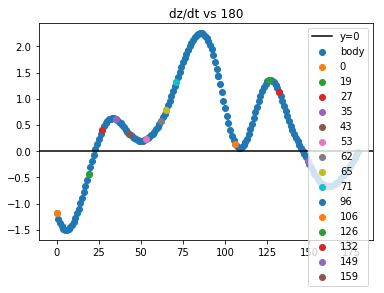

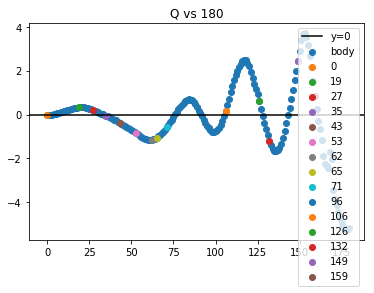

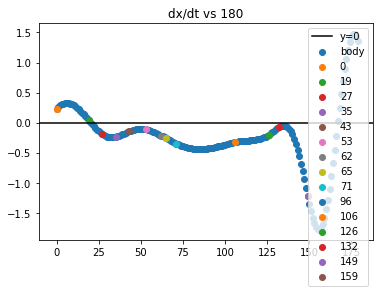

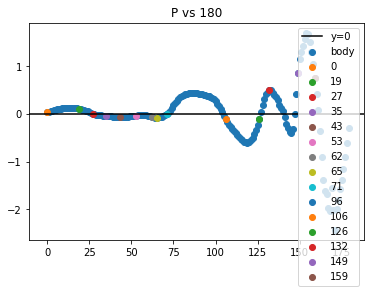

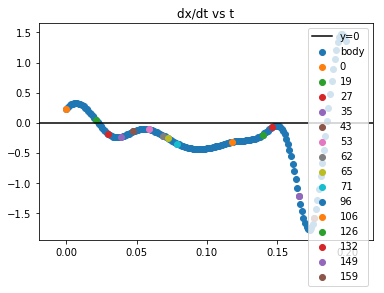

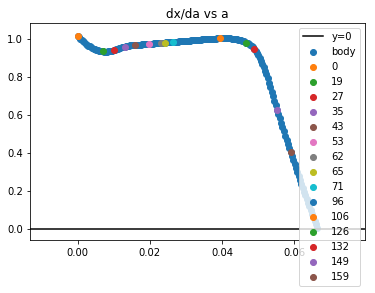

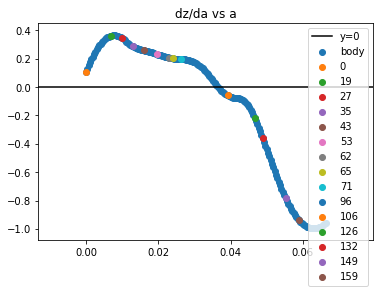

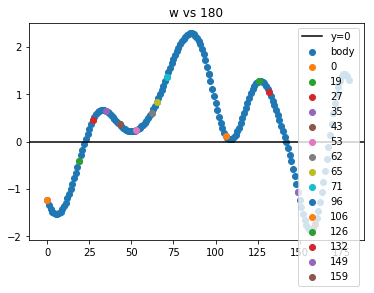

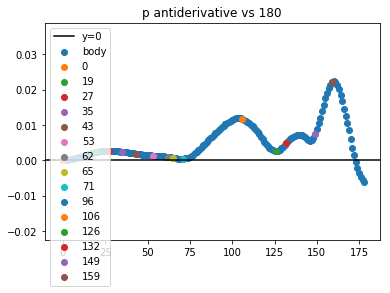

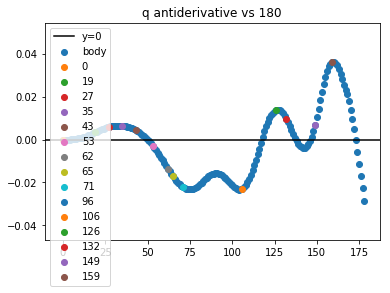

In [69]:
tailmarkers = [0, 19, 27, 35, 43, 53, 62, 65, 71, 96, 106, 126, 132, 149, 159]
plotter(-1, tailmarkers)

Below are the plots at the nose. The last bodypoint at which the fish's nose is still in water is around index 9. It is interesting that at the nose, dx/dt starts positive and goes towards 0 while almost every other point afterwards starts negative and goes toward 0. This can be answered with further work.

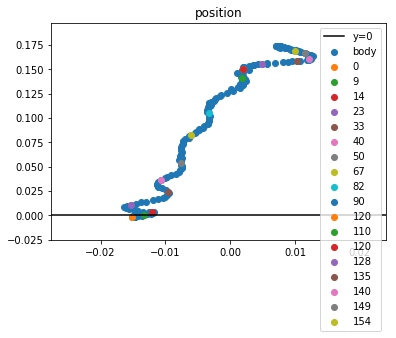

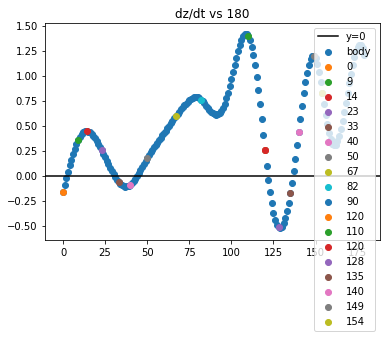

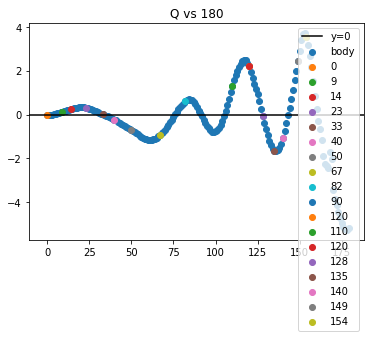

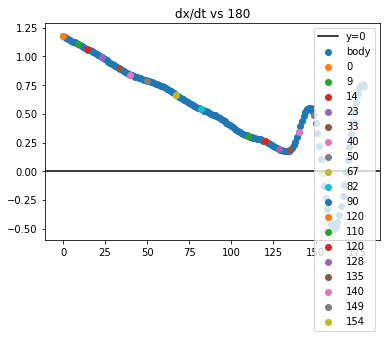

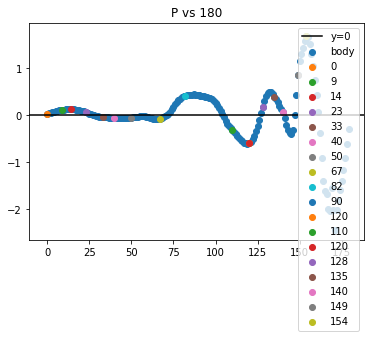

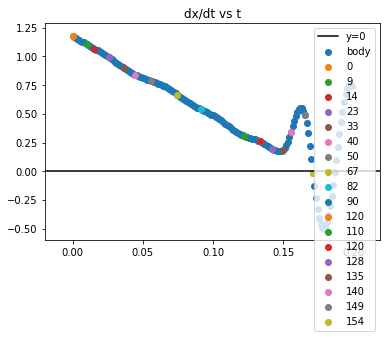

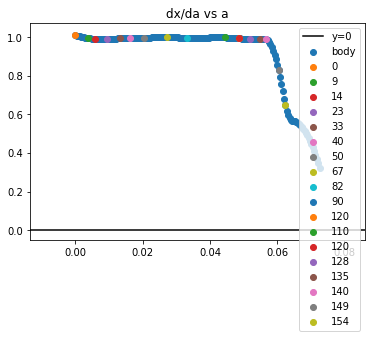

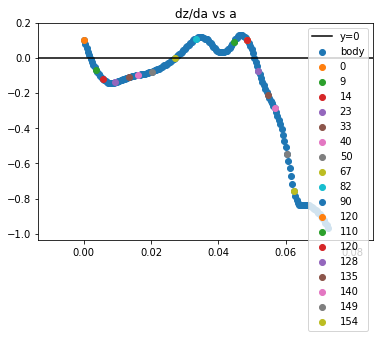

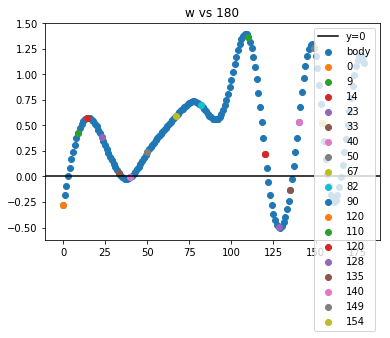

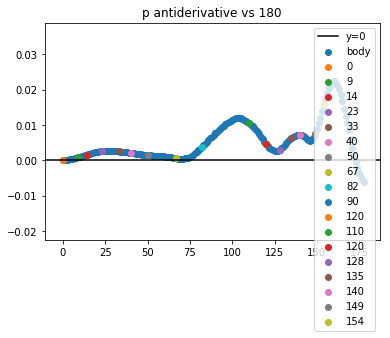

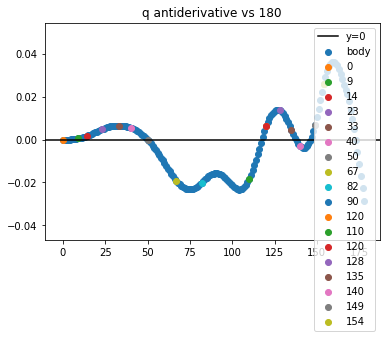

In [71]:
nosemarkers = [0, 9, 14, 23, 33, 40, 50, 67, 82, 90, 120, 110, 120, 128, 135, 140, 149, 154]
plotter(0, nosemarkers)

Below is the slope of the dx/dt graph of the nose at the linear portion out of the water. We expect it to be on the order of magnitude of acceleration due to the gravity, since it should be near ballistic once out of the water.

In [72]:
(np.transpose(archerfish.dxdt)[0][120]-np.transpose(archerfish.dxdt)[0][9])/(archerfish.t[120]-archerfish.t[9])

-6.842385190525565

Below are the plots rougly around the center of gravity of the fish (~35% of the fish's body, measured from the nose). The center of gravity is out of water around index 35. 

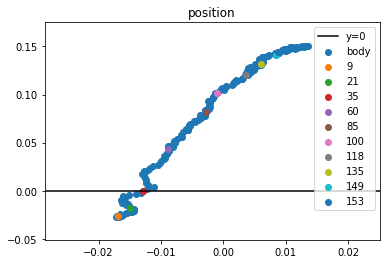

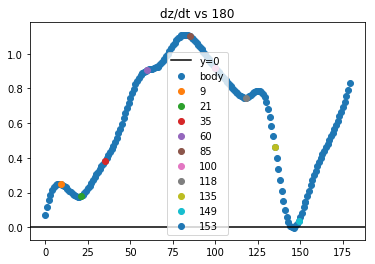

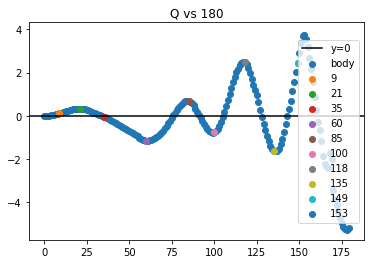

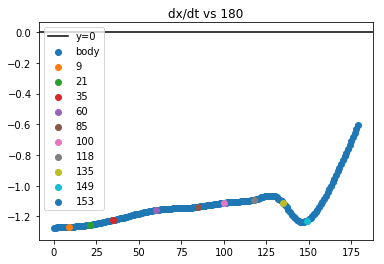

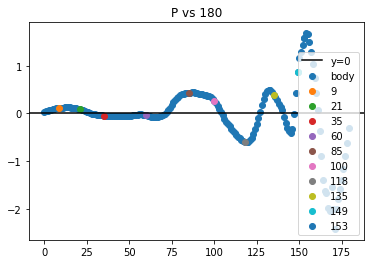

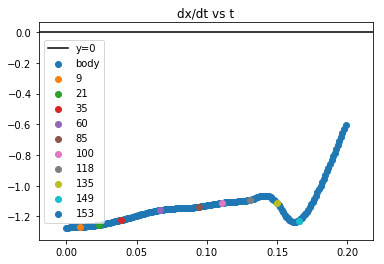

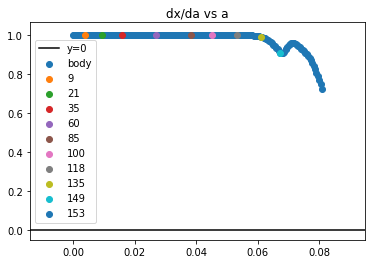

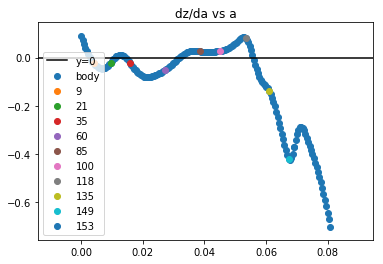

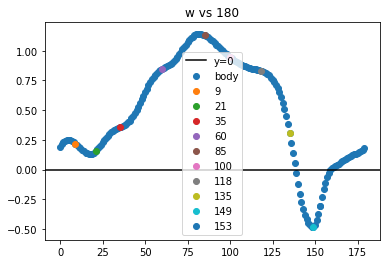

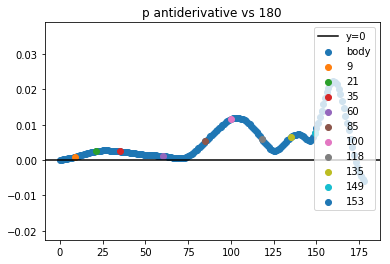

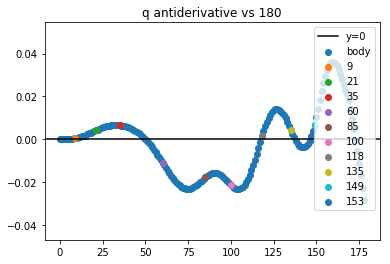

In [74]:
cmmarkers = [9, 21, 35, 60, 85, 100, 118, 135, 149, 153]
plotter(63, cmmarkers)

Again, we calculate the slope of the linear portion of dx/dt of the CM below. It is much less than the acceleration due to gravity and different from the acceleration at the nose. This is confusing and counter-intuitive.

In [75]:
(np.transpose(archerfish.dxdt)[63][118]-np.transpose(archerfish.dxdt)[63][35])/(archerfish.t[118]-archerfish.t[35])

1.4389492969360942

### P and Q data

The rest of the plots and data on P and Q are given below.

Text(0,0.5,'q')

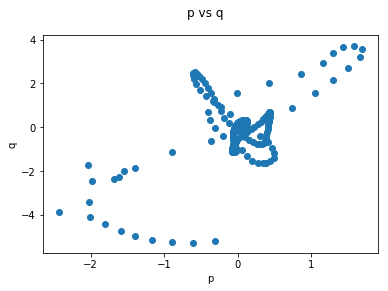

In [36]:
plt.scatter(archerfish.p,archerfish.q)
plt.suptitle('p vs q')
plt.xlabel('p')
plt.ylabel('q')

Below is thrust force and sideforce vs time, where the time axis is reversed. This should be revised according to physical data but there is an indicator from the previous section that the times should not be reversed. There are also comments that can be un-commented to compare the integral term and tail term of each force component.

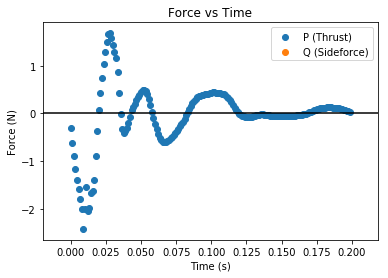

In [5]:
plt.scatter(archerfish.t[::-1],archerfish.p)
#plt.scatter(archerfish.t[::-1],archerfish.Pinte)
#plt.scatter(archerfish.t[::-1],archerfish.Ptail)
plt.scatter(archerfish.t[::-1],archerfish.q)
#plt.scatter(archerfish.t[::-1],archerfish.qinte)
#plt.scatter(archerfish.t[::-1],archerfish.qtail)
#plt.legend(['p','pinte','ptail','q','qinte','qtail'])
plt.legend(['P (Thrust)','Q (Sideforce)'])
plt.title('Force vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.axhline(y=0,color='black')
plt.xticks(np.arange(0,0.201,0.025))
plt.show()


The tail term of Q is plotted versus 180 below. Grid lines are provided to analyze peaks. This format can also be adapted to analyze the plots in the previous section.

Text(0,0.5,'Force (N)')

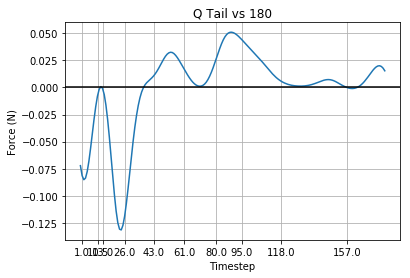

In [80]:
#plt.plot(range(180),archerfish.p[::-1])
plt.plot(range(180),archerfish.qtail[::-1])
#plt.xticks([1,14,24,34,44,54,65,72,97,110,133,160,180])
#plt.xticks(np.arange(0,180,step=3))
plt.xticks([1,10.5,13,26,43,61,80,95,118,157])
plt.grid()
#ax.set_xlim(0, 3 * np.pi);
#plt.legend(['p','q'])
plt.axhline(y=0,color='black')
plt.title('Q Tail vs 180')
plt.xlabel('Timestep')
plt.ylabel('Force (N)')

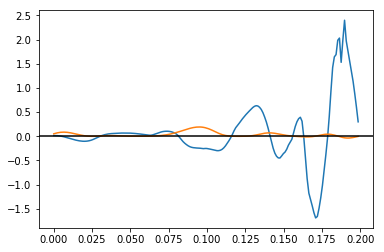

In [44]:
plt.plot(archerfish.t, archerfish.Pinte) # s=0
plt.plot(archerfish.t, archerfish.Ptail)
plt.axhline(y=0,color='black')
#print(archerfish.Pinte) 

[ 6.74319882e-02  5.08802980e-02  3.56598813e-02  2.21464324e-02
  1.23529495e-02  4.69587132e-03 -2.22381208e-03 -6.21539013e-03
 -1.06362186e-02 -1.35127487e-02 -1.51422270e-02 -1.64580197e-02
 -1.60434535e-02 -1.47689639e-02 -1.33975128e-02 -1.10583631e-02
 -8.40777525e-03 -7.09970902e-03 -4.96248760e-03 -3.38479465e-03
 -2.55109411e-03 -1.95441787e-03 -1.22775143e-03 -1.82284141e-03
 -3.16517398e-03 -1.91623638e-03 -9.34146920e-04 -6.37863842e-04
  2.38138403e-04  9.28082394e-04  1.32537014e-03  2.69780364e-03
  4.15188581e-03  4.86285938e-03  6.18748538e-03  6.09946233e-03
  5.18709458e-03  4.62500149e-03  3.99230850e-03  2.74709444e-03
  1.59929723e-03  2.05516590e-04 -8.80846326e-04 -1.55266690e-03
 -1.39553236e-03 -6.10409878e-04 -7.18897655e-04 -6.63387148e-04
 -4.94112995e-04 -7.38397541e-04 -9.50252889e-04 -1.35261284e-03
 -2.24402509e-03 -2.96761770e-03 -3.82173829e-03 -5.12306594e-03
 -6.63615325e-03 -7.51215576e-03 -8.27957187e-03 -7.50069991e-03
 -6.13509281e-03 -9.15486

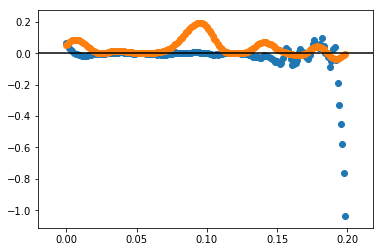

In [49]:
plt.scatter(archerfish.t, archerfish.Pinte) # s=0.000000001
plt.scatter(archerfish.t, archerfish.Ptail)
plt.axhline(y=0,color='black')
print(archerfish.Pinte) 

## Further Work

Lighthill model:
* Revise inextensibility function to check inextensibility of the fish body with our modified functions.
    * There is a commented function that should already include parameters such as tolerance. The function needs to be revised to check the arrays in the new implementation.
* Cut off data after a certain point in order to reduce noise (preferably after jumping out of the water).
    * There is already a function called underwaterTail that extracts the positions of the tail that are underwater. Calling the length of one of the arrays should provide the index where the tail is out of the water.
* Account for ballistic force once out of the water, if we choose to retain the data.
    * Using the underwaterTail function, we may make a function with if-else statements to account for when the body is in (Lighthill's model) vs out (ballistic/Newtonian) of the water.
* Check if it physically makes sense for dx/dt at the snout to be different than the rest of the body.
* Additionally, determine why the slopes of dx/dt are different from plot to plot.
* Determine if time (or other axes) should be flipped. 
* Use anti-derivatives of forces to check if velocities make sense.

Further further work:
* Implement Weihs model and determine if it is necessary to include more tail fins.